# Import Python Modules

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 

import json
from wordcloud import WordCloud
from matplotlib.lines import Line2D
# matplotlib.rcParams['figure.figsize']=[33,33]
from importlib import reload
import CircadianAnalysisFuncs as caf
from scipy.stats import linregress
import scipy as sc
from scipy import stats
import statsmodels.stats.multitest as smt
import json
import re
import powerlaw # pip install powerlaw

import matplotlib.gridspec as gridspec
import seaborn as sns
import networkx as nx  

import warnings
warnings.filterwarnings("ignore")

In [3]:
mainRoot = os.getcwd()
mainRoot

'/media/sf_CellBox'

In [4]:
resultsDir = 'results'
moduleDir='cellbox_output_module_model'
geneDir='cellbox_output_gene_model'


In [5]:

pipelineStatsDf = pd.DataFrame()

trialNames=['Cellbox_Module','Cellbox_Gene']
minTestLossList=[]
minValidLossList=[]
minTestSeedList=[]
minTestSubstageList=[]
minValidSeedList=[]
minValidSubstageList=[]
allTestLoss=[]
allValidLoss=[]
varianceTestLoss=[]
varianceValidLoss=[]
meanTestLoss=[]
meanValidLoss=[]
numberOfModels=[]



# Concentration and Circadian Traces of best models

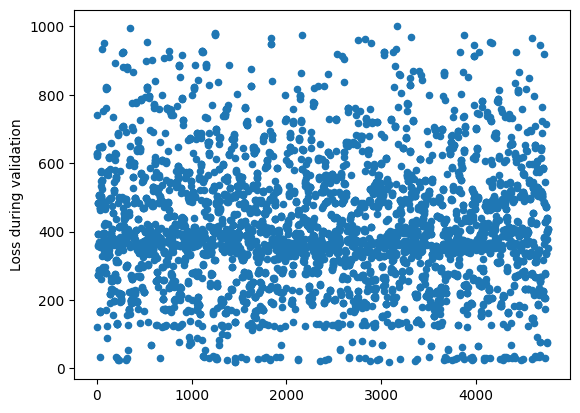

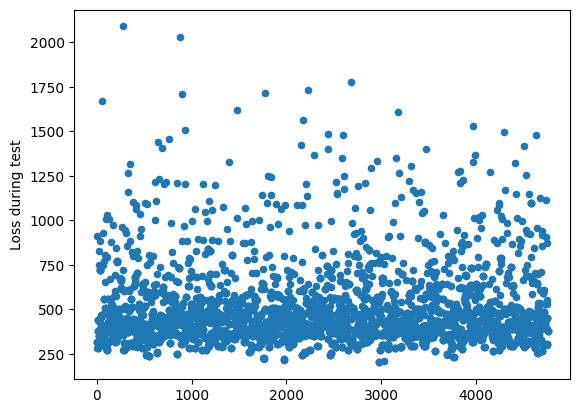

Min test_loss: 201.7140655517578
Min test_loss index: 2978
seed                                          seed_627
substage                                             4
valid_loss                          482.11861022949216
test_loss                            201.7140655517578
alpha_file    4_best.alpha.loss.482.11861022949216.csv
eps_file        4_best.eps.loss.482.11861022949216.csv
W_file            4_best.W.loss.482.11861022949216.csv
y_hat_file    4_best.y_hat.loss.482.11861022949216.csv
Name: 2978, dtype: object

Min valid_loss: 17.000129070281982
Min valid_loss index: 1460
seed                                          seed_303
substage                                             5
valid_loss                          17.000129070281982
test_loss                            522.1677856445312
alpha_file    5_best.alpha.loss.17.000129070281982.csv
eps_file        5_best.eps.loss.17.000129070281982.csv
W_file            5_best.W.loss.17.000129070281982.csv
y_hat_file    5_best.y_hat.

NameError: name 'tracef' is not defined

In [6]:
reload(caf)
os.chdir(mainRoot)

trialDataFrame = caf.ProduceLossDataFrame(mainRoot,resultsDir+"/"+moduleDir)
minTestSeed,minTestSubstage,minTestLoss,minValidSeed,minValidSubstage,minValidLoss = caf.AnalyseTrialDataFrame(trialDataFrame,True)
minTestLossList.append(minTestLoss)
minValidLossList.append(minValidLoss)
minTestSeedList.append(minTestSeed)
minTestSubstageList.append(minTestSubstage)
minValidSeedList.append(minValidSeed)
minValidSubstageList.append(minValidSubstage)
allTestLoss.append(np.asfarray(trialDataFrame['test_loss'].values))
allValidLoss.append(np.asfarray(trialDataFrame['valid_loss'].values))
numberOfModels.append(len(np.asfarray(trialDataFrame['valid_loss'].values)))
meanTestLoss.append(np.mean(np.asfarray(trialDataFrame['test_loss'].values)))
meanValidLoss.append(np.mean(np.asfarray(trialDataFrame['valid_loss'].values)))
varianceTestLoss.append(np.var(np.asfarray(trialDataFrame['test_loss'].values)))
varianceValidLoss.append(np.var(np.asfarray(trialDataFrame['valid_loss'].values)))

dataDir ='Cellbox_tests/Cellbox_Module'
trialOutputDir=moduleDir
noilist=[63,98,42,73,84,81,88,104,105]
caf.plotBestModel(mainRoot,trialDataFrame,resultsDir,dataDir,trialOutputDir,minTestSeed,minTestSubstage,noilist)



In [ ]:
reload(caf)
os.chdir(mainRoot)
# mainRoot=os.getcwd()

trialDataFrame = caf.ProduceLossDataFrame(mainRoot,resultsDir+"/"+geneDir)
minTestSeed,minTestSubstage,minTestLoss,minValidSeed,minValidSubstage,minValidLoss = caf.AnalyseTrialDataFrame(trialDataFrame,True)
minTestLossList.append(minTestLoss)
minValidLossList.append(minValidLoss)
minTestSeedList.append(minTestSeed)
minTestSubstageList.append(minTestSubstage)
minValidSeedList.append(minValidSeed)
minValidSubstageList.append(minValidSubstage)
allTestLoss.append(np.asfarray(trialDataFrame['test_loss'].values))
allValidLoss.append(np.asfarray(trialDataFrame['valid_loss'].values))
numberOfModels.append(len(np.asfarray(trialDataFrame['valid_loss'].values)))
meanTestLoss.append(np.mean(np.asfarray(trialDataFrame['test_loss'].values)))
meanValidLoss.append(np.mean(np.asfarray(trialDataFrame['valid_loss'].values)))
varianceTestLoss.append(np.var(np.asfarray(trialDataFrame['test_loss'].values)))
varianceValidLoss.append(np.var(np.asfarray(trialDataFrame['valid_loss'].values)))

dataDir ='Cellbox_tests/Cellbox_Gene'
trialOutputDir=geneDir
noilist=[63,98,42,73,84,81,88,104,105]
caf.plotBestModel(mainRoot,trialDataFrame,resultsDir,dataDir,trialOutputDir,minTestSeed,minTestSubstage,noilist)



Visualise the summary statistics of the models

In [ ]:
pipelineStatsDf = pd.DataFrame()

pipelineStatsDf['Test Names']=['Cellbox_Module','Cellbox_Module']
pipelineStatsDf['Number of Models']=numberOfModels
pipelineStatsDf['Test Loss']=minTestLossList
pipelineStatsDf['Mean Test Loss']=meanTestLoss
pipelineStatsDf['Variance Test Loss']=varianceTestLoss
pipelineStatsDf['Validation Loss']=minValidLossList
pipelineStatsDf['Mean Validation Loss']=meanValidLoss
pipelineStatsDf['Variance Validation Loss']=varianceValidLoss
pipelineStatsDf['test seed']=minTestSeedList
pipelineStatsDf['test substage']=minTestSubstageList
pipelineStatsDf['validation seed']=minValidSeedList
pipelineStatsDf['validation substage']=minValidSubstageList
display(pipelineStatsDf)

Violin plot showing the mean and variance of the cellbox machine learning loss during testing, for both the Module and Gene models.

In [ ]:
fig,ax = plt.subplots()
ax.set_ylabel('Test Loss')
ax.set_xlabel('Experiment')
ax.violinplot(allTestLoss, showmeans=True)
ax.set_xticks(np.arange(len(pipelineStatsDf['Test Names']))+1)
ax.set_xticklabels(pipelineStatsDf['Test Names'])
plt.grid()
plt.show()

Violin plot showing the mean and variance of the cellbox machine learning loss during the validation step, for both the Module and Gene models.

In [ ]:
fig,ax = plt.subplots()
ax.set_ylabel('Validation Loss')
ax.set_xlabel('Experiment')
ax.violinplot(allValidLoss, showmeans=True)
ax.set_xticks(np.arange(len(pipelineStatsDf['Test Names']))+1)
ax.set_xticklabels(pipelineStatsDf['Test Names'])
plt.grid()
plt.show()

# Produce the simulation gene networks

In [ ]:
os.chdir(mainRoot)
tDir = moduleDir
GN_module,statistics_TRN_known_module,statistics_TRN_module,top2_interactions_df_module,Wij_index_module = caf.FromTrialDirectoryProduceNetwork(resultsDir,tDir)


In [ ]:
os.chdir(mainRoot)
tDir = geneDir
GN_gene,statistics_TRN_known_gene,statistics_TRN_gene,top2_interactions_df_gene,Wij_index_gene = caf.FromTrialDirectoryProduceNetwork(resultsDir,tDir)


In [ ]:
matplotlib.rcParams['figure.figsize']=[33,63]

Parse the known genes and their interactions from the literature data.

In [ ]:
trnCompleteDF = pd.read_csv('../Data/annotation/TRN_complete.csv')
display(trnCompleteDF)
regGeneList=trnCompleteDF['regulatoryGene'].tolist()
tarGeneList=trnCompleteDF['targetGene'].tolist()

knownGeneNetwork= nx.Graph()

for x,y in zip(regGeneList,tarGeneList):
    knownGeneNetwork.add_edge(x,y)

moduleDF = pd.read_excel('Mod_TF_enrichments_max_regs-2_fdr-1e-3.xlsx')
display(moduleDF)
regGeneList=moduleDF['regulatoryGene'].tolist()
tarGeneList=moduleDF['Module'].tolist()

for x,y in zip(regGeneList,tarGeneList):
    xs = str(x)
    for i in xs.split(', '):
        knownGeneNetwork.add_edge(i,str(y))


In [ ]:
nx.draw(knownGeneNetwork)

We include some node labels to improve network readability.

In [ ]:
node_labels_map={
                
                'SYNPCC7942_RS03465':'a',
                'SYNPCC7942_RS00480':'b',
                'SYNPCC7942_RS08035':'c',
                'SYNPCC7942_RS09380':'d',
                'SYNPCC7942_RS05680':'e',
                'SYNPCC7942_RS06230':'f',
                'SYNPCC7942_RS00560':'g',
                'SYNPCC7942_RS09065':'h',
                'SYNPCC7942_RS03075':'i',
                'SYNPCC7942_RS00645':'j',
                'SYNPCC7942_RS07435':'k',
                'SYNPCC7942_RS03605':'l',
                'SYNPCC7942_RS02895':'m',
                'SYNPCC7942_RS09760':'n',
                'SYNPCC7942_RS07940':'o',
                'SYNPCC7942_RS11420':'p',
                'SYNPCC7942_RS02830':'q',
                'SYNPCC7942_RS11720':'r',
                'SYNPCC7942_RS00175':'s',
                'SYNPCC7942_RS01550':'t',
                'SYNPCC7942_RS01610':'u',
                'SYNPCC7942_RS02805':'v',
                'SYNPCC7942_RS03590':'w',
                'SYNPCC7942_RS07150':'x',
                'SYNPCC7942_RS07490':'y',
                'SYNPCC7942_RS08215':'z',
                'SYNPCC7942_RS08220':'aa',
                'SYNPCC7942_RS08225':'ab',
                'SYNPCC7942_RS08340':'ac',
                'SYNPCC7942_RS08445':'ad',
                'SYNPCC7942_RS08930':'ae',
                'SYNPCC7942_RS10020':'af',
                'SYNPCC7942_RS11520':'ag',
                'SYNPCC7942_RS11725':'ah',
                'SYNPCC7942_RS11825':'ai',
                'SYNPCC7942_RS11860':'aj',
                'SYNPCC7942_RS11865':'ak',
                'SYNPCC7942_RS11870':'al',
                'SYNPCC7942_RS11950':'am',
                'SYNPCC7942_RS12135':'an',
                'SYNPCC7942_RS13255':'ao'

                }

Form the interaction network for the Module model

In [ ]:
GN_module

In [ ]:
reload(caf)
threshold = 0.15
GN_out, node_color, edge_color, reducedEdges, maxWeight = caf.ProduceIntersectionMappedToThresholdPrimaryNetwork(GN_module,knownGeneNetwork,threshold)


edge_color=[]
colorList=['tab:green','tab:orange','tab:blue']


for edge1 in reducedEdges:
    for edge2 in GN_out.edges(data=True):
        if edge1[0] == edge2[0] and edge1[1] == edge2[1]:
            edge_color.append(colorList[edge2[2]['color']])
            
GN_out_labelled = nx.relabel_nodes(GN_out,node_labels_map)
pos=nx.circular_layout(GN_out_labelled)
nx.draw_networkx_nodes(GN_out_labelled,pos,node_color=node_color,node_size=3000,alpha=1)


lineThickness=[]
for i in range(len(reducedEdges)):
    edge=reducedEdges[i]

    edge=list(edge)
    if edge[0] in node_labels_map.keys():
        edge[0] = node_labels_map[edge[0]]
    if edge[1] in node_labels_map.keys():
        edge[1] = node_labels_map[edge[1]]
        
    edge=tuple(edge)

    
    nx.draw_networkx_edges(GN_out_labelled,pos,edgelist=[edge],width=10*edge[2]/maxWeight,edge_color=edge_color[i],alpha=max([edge[2]/maxWeight,1.0]))
    lineThickness.append(edge[2]/maxWeight)
text=nx.draw_networkx_labels(GN_out_labelled,pos, font_size=20, font_weight='bold')

plt.box(False)
plt.show()


In [ ]:
for node in GN_module:
    print(node)

Form the interaction network for the gene model.

In [ ]:
threshold = 0.0225
GN_out, node_color, edge_color, reducedEdges, maxWeight = caf.ProduceIntersectionMappedToThresholdPrimaryNetwork(GN_gene,knownGeneNetwork,threshold)


edge_color=[]
colorList=['tab:green','tab:orange','tab:blue']


for edge1 in reducedEdges:
    for edge2 in GN_out.edges(data=True):
        if edge1[0] == edge2[0] and edge1[1] == edge2[1]:
            edge_color.append(colorList[edge2[2]['color']])
            
GN_out_labelled = nx.relabel_nodes(GN_out,node_labels_map)
pos=nx.circular_layout(GN_out_labelled)
nx.draw_networkx_nodes(GN_out_labelled,pos,node_color=node_color,node_size=3000,alpha=1)



lineThickness=[]
for i in range(len(reducedEdges)):
    edge=reducedEdges[i]

    edge=list(edge)
    if edge[0] in node_labels_map.keys():
        edge[0] = node_labels_map[edge[0]]
    if edge[1] in node_labels_map.keys():
        edge[1] = node_labels_map[edge[1]]
        
    edge=tuple(edge)

    nx.draw_networkx_edges(GN_out_labelled,pos,edgelist=[edge],width=10*edge[2]/maxWeight+3,edge_color=edge_color[i],alpha=max([edge[2]/maxWeight,1.0]))
    lineThickness.append(edge[2]/maxWeight)
text=nx.draw_networkx_labels(GN_out_labelled,pos, font_size=20, font_weight='bold')

plt.box(False)
plt.show()


# Form the co-occurence word clouds

Determine matchings between computational and experimentally significant genes

In [ ]:
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [ ]:
# overwrite some gene names
wcDict={}
wcDict["Synpcc7942_0677"]="pex"
wcDict["Synpcc7942_0095"]="RpaA"
wcDict["Synpcc7942_1573"]="dgh2"
wcDict["Synpcc7942_1849"]="SigC"
wcDict["Synpcc7942_1108"]="Hbs1"
wcDict["Synpcc7942_1216"]="KaiC"
wcDict["Synpcc7942_0110"]="XRE"
wcDict["Synpcc7942_1784"]="SigI"
wcDict["Synpcc7942_0599"]="TetR"
wcDict["Synpcc7942_0127"]="ntcA"
wcDict["Synpcc7942_1453"]="RpaB"
wcDict["Synpcc7942_0703"]="DprA"
wcDict["Synpcc7942_0569"]="SigA4"
wcDict["Synpcc7942_1923"]="SigG"
wcDict["Synpcc7942_1557"]="SigA6"
wcDict["Synpcc7942_2248"]="Hbs2"
wcDict["Synpcc7942_0556"]="srrB"
wcDict["Synpcc7942_2306"]="DnaJ"
wcDict["Synpcc7942_0035"]="Lip"
wcDict["Synpcc7942_0304"]="Coq4"
wcDict["Synpcc7942_0316"]="Synpcc7942_0316"
wcDict["Synpcc7942_0551"]="MMPL"
wcDict["Synpcc7942_0700"]="UspA"
wcDict["Synpcc7942_1397"]="Smc"
wcDict["Synpcc7942_1464"]="SomA(1)"
wcDict["Synpcc7942_1610"]="pntB"
wcDict["Synpcc7942_1611"]="pntA-2"
wcDict["Synpcc7942_1612"]="pntA"
wcDict["Synpcc7942_1635"]="SomB(2)"
wcDict["Synpcc7942_1656"]="katG"
# wcDict["Synpcc7942_1757"]="PriA"
wcDict["Synpcc7942_1757"]=""

wcDict["Synpcc7942_1976"]="ndhD1"
wcDict["Synpcc7942_2307"]="HNHc"
wcDict["Synpcc7942_2326"]="SIMPL"
wcDict["Synpcc7942_2333"]="OpcA"
wcDict["Synpcc7942_2334"]="ZWF"
wcDict["Synpcc7942_2335"]="fbp"
wcDict["Synpcc7942_2352"]="yfiA"
wcDict["Synpcc7942_2388"]="oxdC"
wcDict["Synpcc7942_2602"]="ctaC"

wcDict["Synpcc7942_0245"]="gap1"
wcDict["Synpcc7942_0797"]="Synpcc7942_0797"
wcDict["Synpcc7942_1572"]="Synpcc7942_1572"
wcDict["Synpcc7942_2082"]="fusA"
wcDict["Synpcc7942_0162"]="Synpcc7942_0162"
wcDict["Synpcc7942_0528"]="Synpcc7942_0528"
wcDict["Synpcc7942_1235"]="narB"
wcDict["Synpcc7942_2401"]="hspA"
wcDict["Synpcc7942_0304"]="Coq4"
wcDict["Synpcc7942_2556"]="hoxY"
wcDict["Synpcc7942_1218"]="KaiA"
wcDict["Synpcc7942_1217"]="KaiB"
wcDict["Synpcc7942_2125"]="Synpcc7942_2125"
wcDict["Synpcc7942_1613"]="DUF2808"
wcDict["Synpcc7942_0905"]="Synpcc7942_0905"
wcDict["Synpcc7942_1368"]="SH3b"
wcDict["Synpcc7942_1338"]="DUF3747"
wcDict["Synpcc7942_2126"]="Synpcc7942_2126"
wcDict["Synpcc7942_2336"]="Synpcc7942_2336"

wcDict["Synpcc7942_0516"]="prc"
wcDict["Synpcc7942_2267"]="Synpcc7942_2267"
wcDict["Synpcc7942_0318"]="Synpcc7942_0318"
wcDict["Synpcc7942_2239"]="DHC"
wcDict["Synpcc7942_0444"]="sek0026"






Produce the protein abundance comparison word cloud

In [ ]:
# for the protein abundance expression measurements

dfModule = pd.read_csv('fromModule.csv',header=None)
dfGene = pd.read_csv('fromGene.csv',header=None)
dfExperiment = pd.read_csv('fromProteinAbundance.csv',header=None)


ModuleList=dfModule[0].tolist()
GeneList=dfGene[0].tolist()
ExperimentList=dfExperiment[0].tolist()
# remove potential duplicates
ModuleList=list(set(ModuleList))
GeneList=list(set(GeneList))
ExperimentList=list(set(ExperimentList))

fullMatch=[]
modelMatch=[]
compOnly=[]
experimentOnly=[]

for gene in ModuleList:
    if gene in GeneList:
        modelMatch.append(gene)

for gene in ExperimentList:
    if gene in modelMatch:
        fullMatch.append(gene)
    else:
        experimentOnly.append(gene)
        
for gene in modelMatch:
    if gene not in fullMatch:
        compOnly.append(gene)
    
ModuleExpMatch=[]
GeneExpMatch=[]
for gene in ModuleList:
    if gene not in GeneList:
        if gene in ExperimentList:
            ModuleExpMatch.append(gene)
            
for gene in GeneList:
    if gene not in ModuleList:
        if gene in ExperimentList:
            GeneExpMatch.append(gene)   
            
fullWordCloud=ModuleList+GeneList+ExperimentList
modelWordCloud=ModuleList+GeneList

In [ ]:
frequenciesModel = {i:modelWordCloud.count(i) for i in set(modelWordCloud)}

frequenciesKeyModel={}
for key in frequenciesModel.keys():
    if key in wcDict.keys():
        frequenciesKeyModel[wcDict[key]] = frequenciesModel[key]
    else:
        frequenciesKeyModel[key] = frequenciesModel[key]
frequenciesKeyModel['SigA4']

In [ ]:
frequenciesGene = {i:GeneList.count(i) for i in set(GeneList)}

frequenciesKeyGene={}
for key in frequenciesGene.keys():
    if key in wcDict.keys():
        frequenciesKeyGene[wcDict[key]] = frequenciesGene[key]
    else:
        frequenciesKeyGene[key] = frequenciesGene[key]
frequenciesKeyGene

In [ ]:
frequenciesModule = {i:ModuleList.count(i) for i in set(ModuleList)}

frequenciesKeyModule={}
for key in frequenciesModule.keys():
    if key in wcDict.keys():
        frequenciesKeyModule[wcDict[key]] = frequenciesModule[key]
    else:
        frequenciesKeyModule[key] = frequenciesModule[key]
frequenciesKeyModule

In [ ]:
frequencies['OpcA']

In [ ]:
frequencies['ZWF']

In [ ]:
for gene in fullMatch:
    if gene in wcDict.keys():
        fullMatch[fullMatch.index(gene)] = wcDict[gene]
for gene in compOnly:
    if gene in wcDict.keys():
        compOnly[compOnly.index(gene)] = wcDict[gene]
for gene in experimentOnly:
    if gene in wcDict.keys():
        experimentOnly[experimentOnly.index(gene)] = wcDict[gene]
        
for gene in ModuleExpMatch:
    if gene in wcDict.keys():
        ModuleExpMatch[ModuleExpMatch.index(gene)] = wcDict[gene]
for gene in GeneExpMatch:
    if gene in wcDict.keys():
        GeneExpMatch[GeneExpMatch.index(gene)] = wcDict[gene]
        

frequenciesOrig = {i:fullWordCloud.count(i) for i in set(fullWordCloud)}

frequencies={}
for key in frequenciesOrig.keys():
    if key in wcDict.keys():
        frequencies[wcDict[key]] = frequenciesOrig[key]
    else:
        frequencies[key] = frequenciesOrig[key]
        
        
x,y=np.ogrid[:500,:500]
mask = (x-250)**2+(y-250)**2 > 250**2
mask = 255*mask.astype(int)

wordcloud = WordCloud(width=500, height=500, max_words=100, max_font_size=80,background_color="white",mask=mask)
wordcloud.generate_from_frequencies(frequencies=frequencies)
    

color_to_words = {

    'orange':fullMatch,
    'blue':compOnly,
#     'red':ModuleExpMatch,
#     'black':GeneExpMatch,
    'gray':ModuleExpMatch,
    'gray':GeneExpMatch,
    
}

# nodes are grey if they only occured once, i.e only experiment or only Module or only Gene
default_color = 'gray'

grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Apply our color function
wordcloud.recolor(color_func=grouped_color_func)
    
    
    
plt.figure(figsize=(26,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

Produce the redox PTM comparison word cloud

In [ ]:
# for the redox PTM expression measurements

dfModule = pd.read_csv('fromModule.csv',header=None)
dfGene = pd.read_csv('fromGene.csv',header=None)
dfExperiment = pd.read_csv('fromRedoxProteomicsDilute.csv',header=None)

ModuleList=dfModule[0].tolist()
GeneList=dfGene[0].tolist()
ExperimentList=dfExperiment[0].tolist()
# remove potential duplicates
ModuleList=list(set(ModuleList))
GeneList=list(set(GeneList))
ExperimentList=list(set(ExperimentList))

fullMatch=[]
modelMatch=[]
compOnly=[]
experimentOnly=[]

for gene in ModuleList:
    if gene in GeneList:
        modelMatch.append(gene)

for gene in ExperimentList:
    if gene in modelMatch:
        fullMatch.append(gene)
    else:
        experimentOnly.append(gene)
        
for gene in modelMatch:
    if gene not in fullMatch:
        compOnly.append(gene)
    
ModuleExpMatch=[]
GeneExpMatch=[]
for gene in ModuleList:
    if gene not in GeneList:
        if gene in ExperimentList:
            ModuleExpMatch.append(gene)
            
for gene in GeneList:
    if gene not in ModuleList:
        if gene in ExperimentList:
            GeneExpMatch.append(gene)   
            
fullWordCloud=ModuleList+GeneList+ExperimentList
modelWordCloud=ModuleList+GeneList

In [ ]:
frequenciesModel = {i:modelWordCloud.count(i) for i in set(modelWordCloud)}

frequenciesKeyModel={}
for key in frequenciesModel.keys():
    if key in wcDict.keys():
        frequenciesKeyModel[wcDict[key]] = frequenciesModel[key]
    else:
        frequenciesKeyModel[key] = frequenciesModel[key]
frequenciesKeyModel['OpcA']

In [ ]:
frequencies['narB']

In [ ]:
for gene in fullMatch:
    if gene in wcDict.keys():
        fullMatch[fullMatch.index(gene)] = wcDict[gene]
for gene in compOnly:
    if gene in wcDict.keys():
        compOnly[compOnly.index(gene)] = wcDict[gene]
for gene in experimentOnly:
    if gene in wcDict.keys():
        experimentOnly[experimentOnly.index(gene)] = wcDict[gene]
        
for gene in ModuleExpMatch:
    if gene in wcDict.keys():
        ModuleExpMatch[ModuleExpMatch.index(gene)] = wcDict[gene]
for gene in GeneExpMatch:
    if gene in wcDict.keys():
        GeneExpMatch[GeneExpMatch.index(gene)] = wcDict[gene]
        

frequenciesOrig = {i:fullWordCloud.count(i) for i in set(fullWordCloud)}

frequencies={}
for key in frequenciesOrig.keys():
    if key in wcDict.keys():
        frequencies[wcDict[key]] = frequenciesOrig[key]
    else:
        frequencies[key] = frequenciesOrig[key]
        
        
x,y=np.ogrid[:500,:500]
mask = (x-250)**2+(y-250)**2 > 250**2
mask = 255*mask.astype(int)
        
wordcloud = WordCloud(width=500, height=500, max_words=100, max_font_size=80,background_color="white",mask=mask)
wordcloud.generate_from_frequencies(frequencies=frequencies)
    

color_to_words = {

    'orange':fullMatch,
    'blue':compOnly,
#     'red':ModuleExpMatch,
#     'black':GeneExpMatch,
    'gray':ModuleExpMatch,
    'gray':GeneExpMatch,
    
}

# nodes are grey if they only occured once, i.e only experiment or only Module or only Gene
default_color = 'gray'

grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Apply our color function
wordcloud.recolor(color_func=grouped_color_func)
    
    
    
plt.figure(figsize=(26,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

